## Import data

In [25]:
file = 'https://hcmuteduvn-my.sharepoint.com/:x:/g/personal/tquang_sdh20_hcmut_edu_vn/ERtCgNRGoLxJmcugOL6vHX8BBixFN9EzGGtZxzasp9prWQ?download=1'
hobbies = read.csv(file,sep=";",header=T)

```header=TRUE``` : indicates that the file contains the names of the variables

```sep=";"``` : indicates the fields separator (usually ";" or "," for csv files)

In [26]:
head(hobbies,5)

,Reading,Listening.music,Cinema,Show,Exhibition,Computer,Sport,Walking,Travelling,Playing.music,...,Gardening,Knitting,Cooking,Fishing,TV,Sex,Age,Marital.status,Profession,nb.activitees
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,y,y,y,y,y,n,y,y,y,n,...,n,n,n,n,2,F,"(55,65]",Married,Management,11
2,y,n,n,n,y,n,y,y,n,n,...,y,n,n,n,4,M,"(45,55]",Married,NA,9
3,y,y,n,n,y,n,n,n,y,n,...,n,n,n,n,4,F,"(25,35]",Remarried,Management,5
4,y,n,n,n,y,n,y,n,y,n,...,n,n,n,n,1,M,"(75,85]",Married,NA,5
5,y,y,y,y,n,n,n,y,n,n,...,n,n,n,n,3,M,"(55,65]",Married,Employee,6


## Transform the TV variable as factor

In [27]:
hobbies[,"TV"] = as.factor(hobbies[,"TV"])
summary(hobbies[,"TV"])

0    1    2    3    4 
1017 1223 2156 1775 2232

## Loading FactoMineR library and Run MCA

Outputs can be summarized with the function ```summary```


In [28]:
library(FactoMineR)
res.mca <- MCA(hobbies,quali.sup=19:22,quanti.sup=23)
summary(res.mca)

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"



Call:
MCA(X = hobbies, quanti.sup = 23, quali.sup = 19:22) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.198   0.081   0.072   0.063   0.058   0.056   0.056
% of var.             16.947   6.913   6.173   5.389   5.011   4.784   4.759
Cumulative % of var.  16.947  23.859  30.033  35.422  40.433  45.217  49.976
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.053   0.053   0.049   0.046   0.045   0.044   0.043
% of var.              4.569   4.547   4.211   3.985   3.864   3.730   3.717
Cumulative % of var.  54.545  59.092  63.303  67.288  71.152  74.881  78.598
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.041   0.038   0.037   0.036   0.035   0.032   0.030
% of var.              3.497   3.256   3.200   3.105   2.997   2.772   2.575
Cumulative % of var.  82.095  85.351  88.551  91.655  94.652  97.425 100.000



### Outputs are given for the first 2 dimensions (by default 3 dimensions are given).

In [29]:
summary(res.mca, ncp=2)


Call:
MCA(X = hobbies, quanti.sup = 23, quali.sup = 19:22) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.198   0.081   0.072   0.063   0.058   0.056   0.056
% of var.             16.947   6.913   6.173   5.389   5.011   4.784   4.759
Cumulative % of var.  16.947  23.859  30.033  35.422  40.433  45.217  49.976
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.053   0.053   0.049   0.046   0.045   0.044   0.043
% of var.              4.569   4.547   4.211   3.985   3.864   3.730   3.717
Cumulative % of var.  54.545  59.092  63.303  67.288  71.152  74.881  78.598
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.041   0.038   0.037   0.036   0.035   0.032   0.030
% of var.              3.497   3.256   3.200   3.105   2.997   2.772   2.575
Cumulative % of var.  82.095  85.351  88.551  91.655  94.652  97.425 100.000



## Graph of the eigenvalues

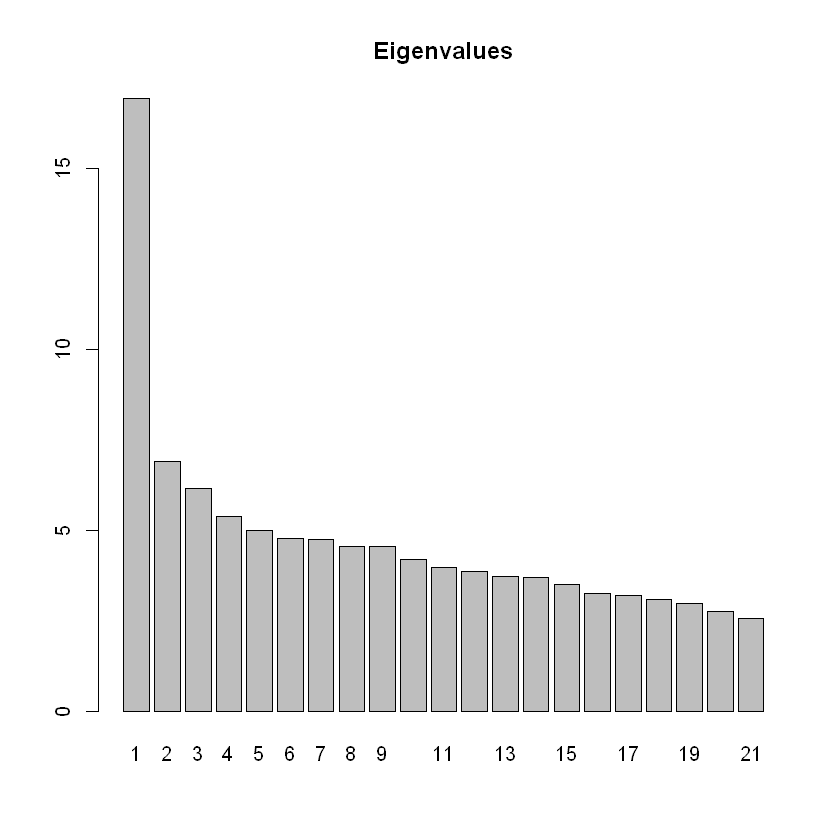

In [30]:
barplot(res.mca$eig[,2],main="Eigenvalues", names.arg=1:nrow(res.mca$eig))

## Graphs of the individuals

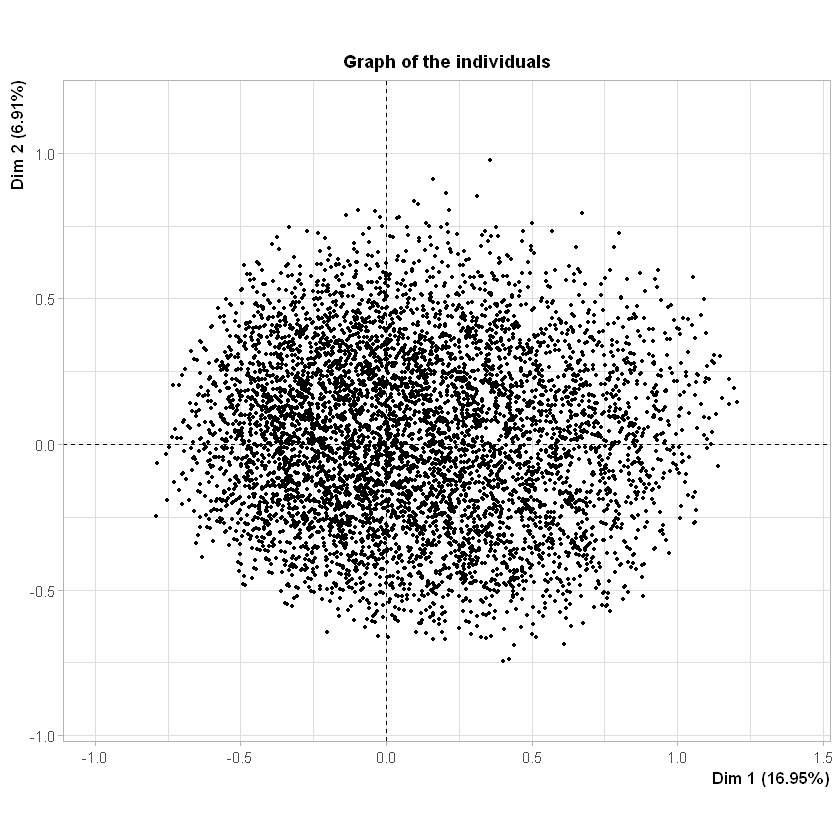

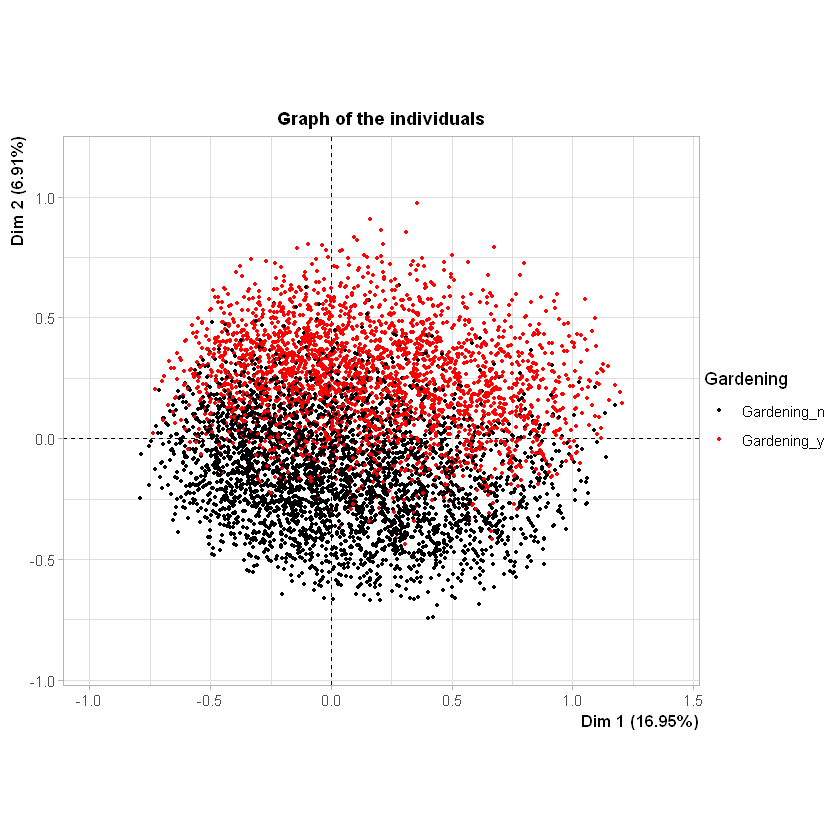

In [31]:
plot(res.mca,invisible=c("var","quali.sup"),cex=.5,label="none",
     title="Graph of the individuals") 
plot(res.mca,invisible=c("var","quali.sup"),cex=.5,label="none",
     title="Graph of the individuals", habillage="Gardening") 

## Graphs of the categories

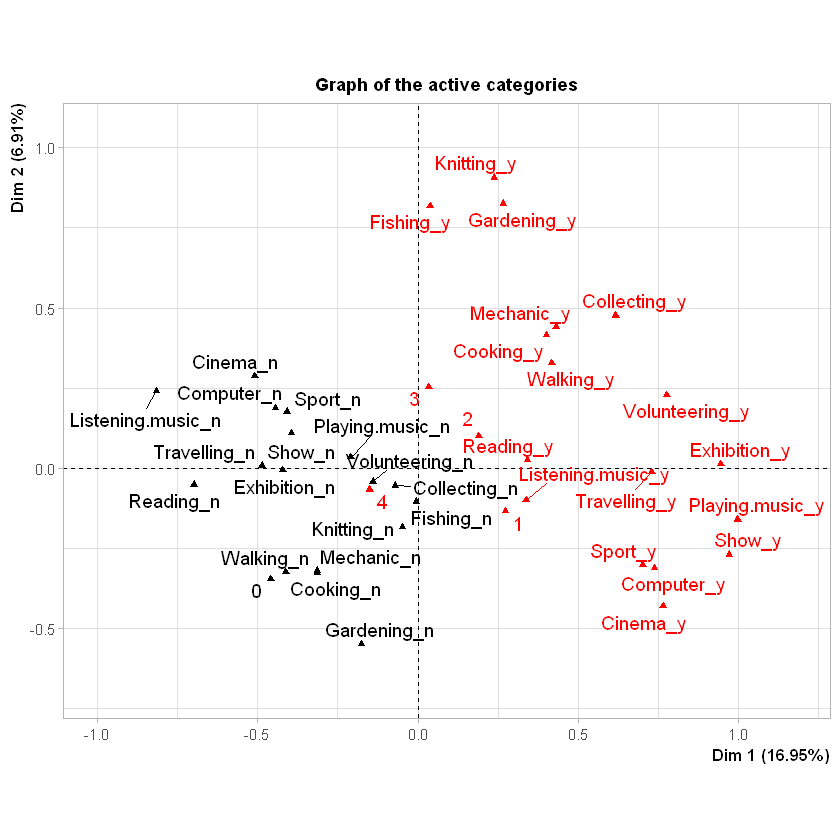

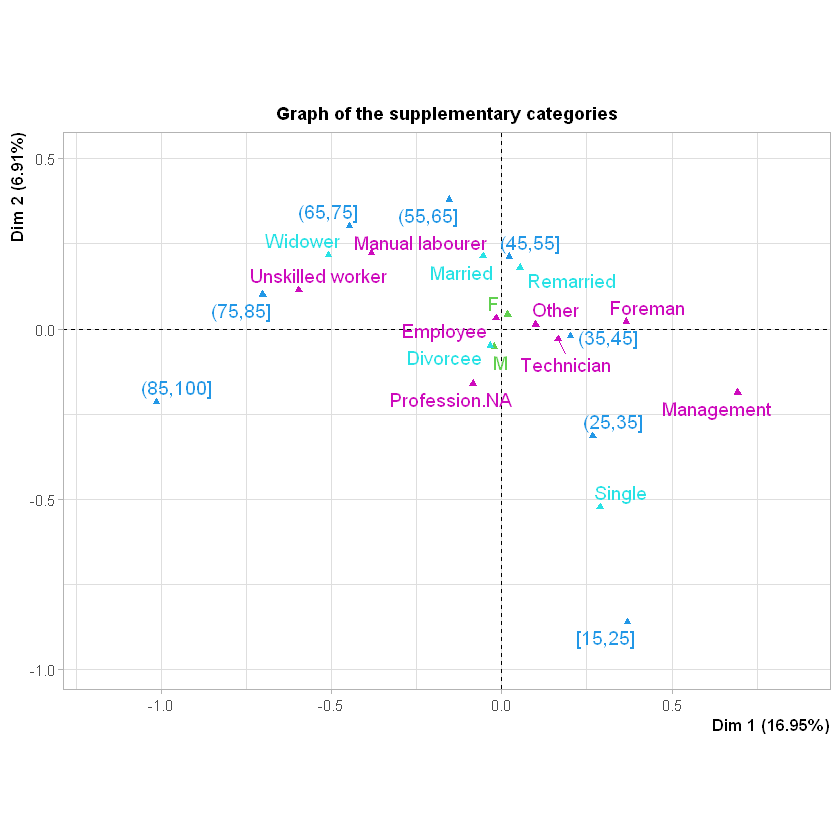

In [32]:
plot(res.mca,invis=c("ind","quali.sup"),col.var=c(rep(c("black","red"),17),"black",rep("red",4)),
     title="Graph of the active categories")
plot(res.mca,invisible=c("ind","var"),hab="quali", 
     palette=palette(c("blue","maroon","darkgreen","black","red")), 
     title="Graph of the supplementary categories")

## Graphs of the variables

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


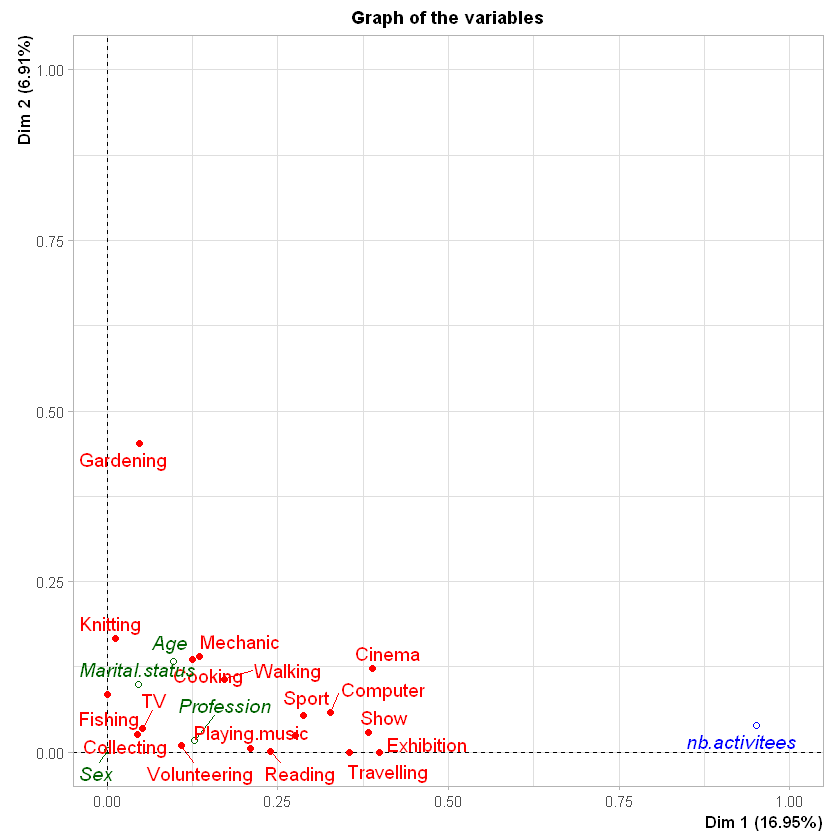

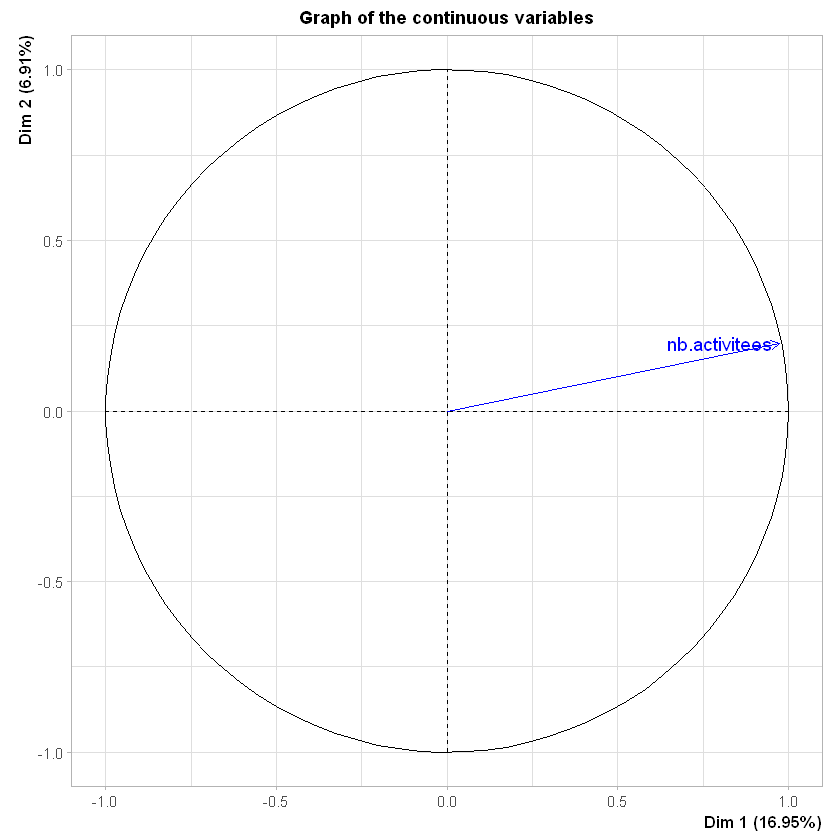

In [33]:
plot(res.mca,choix="var",title="Graph of the variables")
plot(res.mca,choix="quanti.sup",title="Graph of the continuous variables")

## Description of the dimensions

In [34]:
dimdesc(res.mca)

,correlation,p.value
nb.activitees,0.9753459,0
,R2,p.value
Reading,0.23851813,0.000000e+00
Listening.music,0.27548544,0.000000e+00
Cinema,0.38900068,0.000000e+00
Show,0.38335191,0.000000e+00
Exhibition,0.39878925,0.000000e+00
Computer,0.32739645,0.000000e+00
Sport,0.28683998,0.000000e+00
Walking,0.17212148,0.000000e+00


## Confidence ellipses around the categories for the first 4 variables

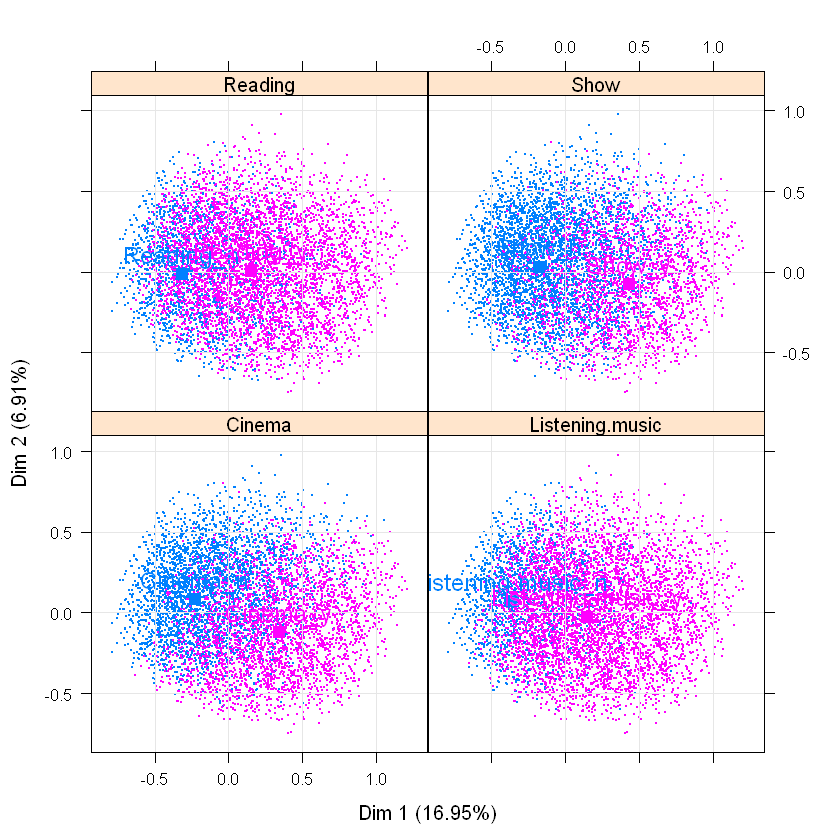

In [35]:
plotellipses(res.mca, cex=0.2, magnify=12, keepvar=1:4)